<a href="https://colab.research.google.com/github/NeutrinoExplorer/iQuHACK2025/blob/main/Winter%20school%20training_1/Qiskit_dia1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
!pip install qiskit #instalar libreria Qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 9.2 MB/s eta 0:00:00


In [ ]:
!pip install qiskit-aer #instalar modulo Aer de la libreria Qiskit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 72.2 MB/s eta 0:00:00


In [ ]:
!pip install pylatexenc #biblioteca de python que permite convertir textos a formato latex


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=998802989e8a1899ac19907fcb53657d24364305ffbc534e6a192b77863bf790
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [ ]:
!pip install helpers #modulo de Qiskit con funciones especiales


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Importing standard Qiskit libraries
import qiskit
import qiskit_aer
import pylatexenc
from qiskit import *
from qiskit_aer import *
from qiskit.compiler import transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.circuit.library import GroverOperator, MCMT, ZGate


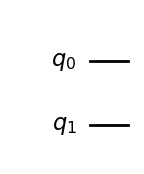

In [ ]:
qc = QuantumCircuit(2,0) #crea un circuito cuántico con 2 qubits y 0 bits clásicos
qc.draw('mpl') #dibuja el circuito cuántico con matplotlib

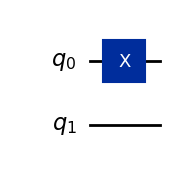

In [ ]:
qc.x(0) #aplica la puerta cuántica X(not cuántico) al qubit 0
qc.draw('mpl') #dibuja el circuito cuántico

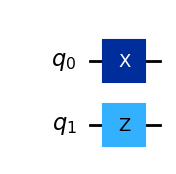

In [ ]:
qc.z(1) #aplica la puerta Z al qubit 1
qc.draw('mpl') #dibuja el circuito cuántico

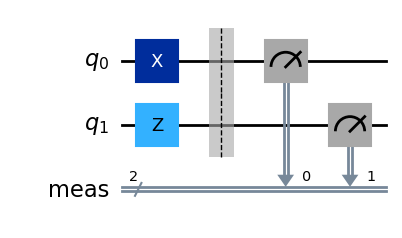

In [ ]:
qc.measure_all() #coloca mediciones a todos los qubits, para ver cómo cambiaron estos luego del circuito cuántico
qc.draw('mpl') #grafica el circuito cuantico

#Simulating a Circuit
Ahora tenemos un circuito cuántico completo. Tenemos un cúbit con algunas puertas aplicadas y lo medimos al final. Queremos ejecutar realmente este circuito y ver qué sucede.

Podemos hacer esto "ejecutando" nuestro circuito cuántico. Podemos especificar un backend. En este caso, usaremos un backend simulado. 'qasm_simulator' es un backend simulado que tiene la opción de agregar ruido (para emular hardware cuántico real). Lo ejecutaremos sin ruido por ahora. También puede especificar la cantidad de "disparos" que desea (cuántas veces ejecutar el circuito). Para este circuito, simulemos 1 disparo.

A partir de un trabajo de simulación, podemos extraer los recuentos, que es un diccionario de los resultados de la medición. Las claves son las cadenas de bits medidas y los valores son la cantidad de veces que se midió esa cadena de bits.


In [ ]:
# Obtiene el backend del simulador cuántico QASM de Aer, que permite simular circuitos cuánticos en hardwore real.
backend = Aer.get_backend('qasm_simulator')

# Transpila el circuito cuántico 'qc' para que sea compatible con el backend seleccionado, optimizando su ejecución.
new_circuit = transpile(qc, backend)

# Ejecuta el circuito transpileado en el backend, realizando una sola medición (shot).
job = backend.run(new_circuit, shots=1)

# Obtiene los resultados de la ejecución del trabajo en el backend.
results = job.result()

# Extrae las cuentas (resultados de medición) del objeto de resultados.
counts = results.get_counts()

# Muestra las cuentas obtenidas como resultado de la ejecución del circuito.
counts

{'01': 1}

#Visualización de resultados
Este diccionario de recuentos es complicado cuando se tienen muchos cúbits. Una buena forma de visualizar los resultados de una simulación de circuito cuántico es con un histograma.

Los contenedores del histograma son "cadenas de bits" en las que el cúbit medido "0" es el bit más a la derecha (el último), el cúbit medido "1" es el penúltimo, etc.

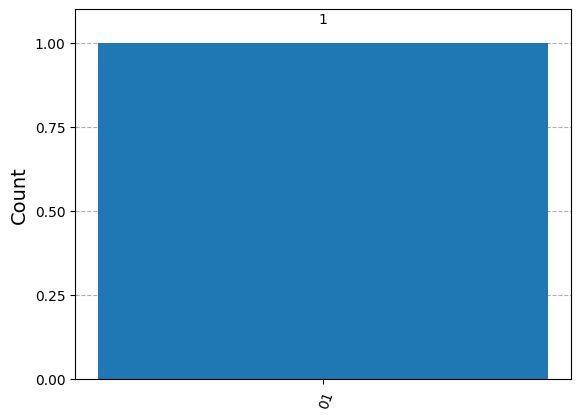

In [ ]:
plot_histogram(counts) #visualiza mediante un histograma las contadas de la variable counts


In [ ]:
# *FILL IN HERE*

In [ ]:
backend = Aer.get_backend('qasm_simulator')

new_circuit = transpile(qc, backend)
job = backend.run(new_circuit, shots = 1)
results = job.result()
counts = results.get_counts()
counts

{'01': 1}

#Recuperación de un vector de estado final
¿Qué ocurre si no queremos conocer una distribución de medidas, sino el vector de estado final del circuito? También podemos recuperar esa información. A continuación se muestra un ejemplo:

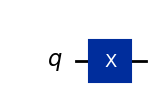

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


In [ ]:
qc = QuantumCircuit(1, 0)  # Crea un circuito cuántico con 1 qubit y 0 bits clásicos (sin mediciones).

qc.x(0)  # Aplica la puerta X (NOT cuántico) al qubit 0, invirtiendo su estado de |0⟩ a |1⟩.

display(qc.draw('mpl'))  # Dibuja y muestra el circuito cuántico en formato de gráfico utilizando Matplotlib.

vec = Statevector(qc)  # Crea un objeto Statevector que representa el estado cuántico del circuito después de aplicar las puertas.

vec  # Muestra el vector de estado resultante del circuito.

# PROBLEMAS PRÁCTICOS

In [ ]:
from qiskit.primitives import Sampler # Import Sampler instead of execute


In [ ]:
# Ejercicio A: Preparar q0 en el estado |+> y mostrar el vector de estado
qc_A = QuantumCircuit(1)  # Crear un circuito cuántico con 1 qubit
qc_A.h(0)  # Aplicar la puerta Hadamard para crear el estado |+>
display(qc_A.draw())  # Dibujar el circuito
state_A = Statevector.from_instruction(qc_A)  # Obtener el vector de estado
print("Vector de estado para |+>:", state_A)  # Mostrar el vector de estado


┌───┐
q: ┤ H ├
   └───┘

Vector de estado para |+>: Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


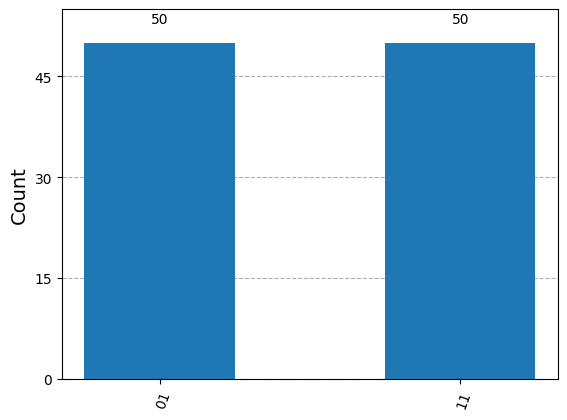

In [ ]:
# Ejercicio B: Preparar q0 en |1> y q1 en |+>, Realice 100 mediciones y genere un histograma de los resultados.
qc_B = QuantumCircuit(2, 2)  # Crear un circuito con 2 qubits q0,q1 y 2 bits clásicos c0,c1
qc_B.x(0)  # Aplicar puerta X para preparar |1> en q0
qc_B.h(1)  # Aplicar puerta Hadamard en q1 para crear |+>
qc_B.measure([0, 1], [0, 1])  # Medir ambos qubits, qc.measure(qubit_index, classical_bit_index) indice 0 del 1er qubit -> indice 0 del 1er bit , 1->1
backend = Aer.get_backend('qasm_simulator')  # Definir el simulador clásico

# En lugar de ejecutar, utilice transpile y backend.run
qc_B_transpiled = transpile(qc_B, backend) # Transpila el circuito para el backend
result_B = backend.run(qc_B_transpiled, shots=100).result()  # Ejecutar simulación

counts_B = result_B.get_counts()  # Obtener los conteos
plot_histogram(counts_B)  # Graficar histograma


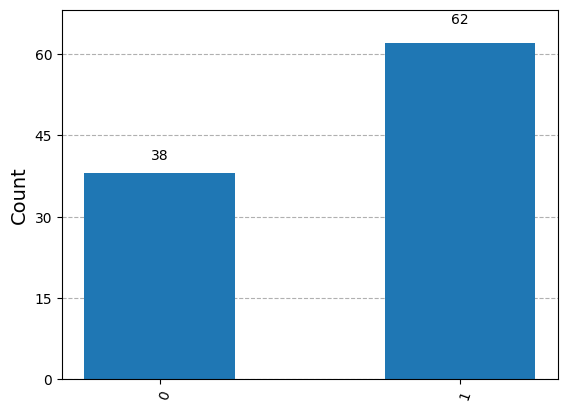

In [ ]:
# Ejercicio C: Preparar q0 en |+> y medirlo 100 veces, Realice 100 mediciones y genere un histograma de los resultados.
qc_C = QuantumCircuit(1, 1)
qc_C.h(0)  # Aplicar Hadamard a q0 para obtener el estado |+>
qc_C.measure(0, 0)  # Medir el qubit
qc_C_transpiled = transpile(qc_C, backend) # Transpila el circuito para el backend
result_C = backend.run(qc_C_transpiled, shots=100).result()  # Ejecutar simulación
counts_C = result_C.get_counts()
plot_histogram(counts_C)  # Graficar histograma


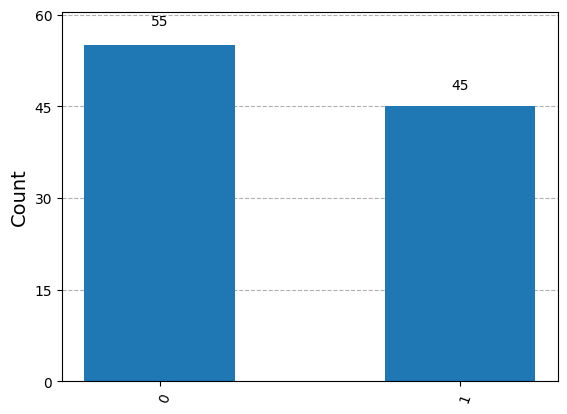

In [ ]:
# Ejercicio D: Preparar q0 en |-> y medirlo 100 veces, Realice 100 mediciones y genere un histograma de los resultados.
qc_D = QuantumCircuit(1, 1)
qc_D.h(0)  # Aplicar Hadamard para |+>
qc_D.z(0)  # Aplicar puerta Z para cambiar a |->
qc_D.measure(0, 0)  # Medir el qubit
qc_D_transpiled = transpile(qc_D, backend) # Transpila el circuito para el backend
result_D = backend.run(qc_D_transpiled, shots=100).result()  # Ejecutar simulación
counts_D = result_D.get_counts()
plot_histogram(counts_D)  # Graficar histograma

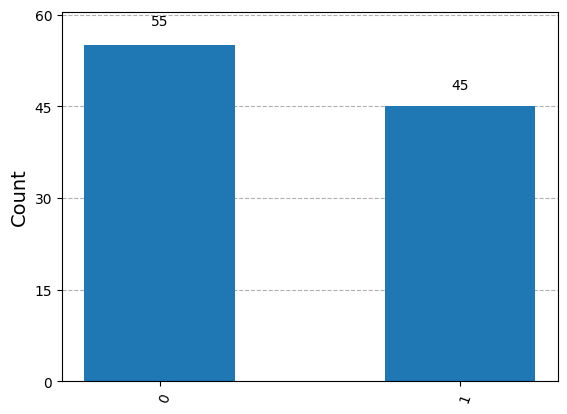

In [ ]:
# Ejercicio E: Distinguir entre |+> y |->
qc_E = QuantumCircuit(1, 1)
qc_E.h(0)  # Aplicar Hadamard antes de medir en la base computacional
qc_E.measure(0, 0)
qc_E_transpiled = transpile(qc_E, backend) # Transpila el circuito para el backend
result_E = backend.run(qc_E_transpiled, shots=100).result()  # Ejecutar simulación
counts_E = result_D.get_counts()
plot_histogram(counts_E)  # Graficar histograma


# Conectando el experimento Stern-Gerlach con la computación cuántica


Z basis measurement:


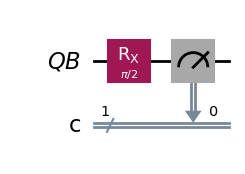

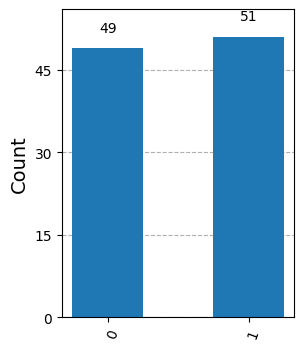

In [ ]:
# 1 QB quantum register
qr = QuantumRegister(1, name="QB")  # Crea un registro cuántico con 1 qubit, nombrado "QB".

# 2 bit classical register -- the length of the register is the number of measurements (number of Stern-Gerlach machines)
cr = ClassicalRegister(1, name='c')  # Crea un registro clásico con 1 bit, nombrado "c", para almacenar los resultados de las mediciones.

# quantum circuit combines quantum and classical registers
qc = QuantumCircuit(qr, cr)  # Crea un circuito cuántico que combina el registro cuántico y el registro clásico.

# applying this gate makes our source which generates qubits which are an equal superposition of |0> and |1> AND an equal superposition of |+> and |->
qc.rx(np.pi/2, 0)  # Aplica la puerta RX al qubit 0, creando una superposición igual de los estados |0⟩ y |1⟩ (y también de |+⟩ y |-⟩).

qc.measure(0, cr)  # Mide el qubit 0 y almacena el resultado en el registro clásico.

print('Z basis measurement:')  # Imprime un mensaje indicando que se realizará una medición en la base Z.
display(qc.draw('mpl'))  # Dibuja y muestra el circuito cuántico en formato gráfico utilizando Matplotlib.

backend = Aer.get_backend('qasm_simulator')  # Obtiene el backend del simulador cuántico QASM de Aer.
new_circuit = transpile(qc, backend)  # Transpila el circuito cuántico para optimizarlo y hacerlo compatible con el backend.
job = backend.run(new_circuit, shots=100)  # Ejecuta el circuito transpileado en el backend, realizando 100 mediciones (shots).
results = job.result()  # Obtiene los resultados de la ejecución del trabajo en el backend.
counts = results.get_counts()  # Extrae las cuentas (resultados de medición) del objeto de resultados.
plot_histogram(counts, figsize=(3,4))  # Muestra un histograma de las cuentas obtenidas como resultado de las mediciones.

X basis measurement:


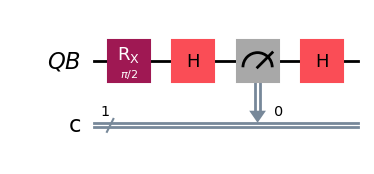

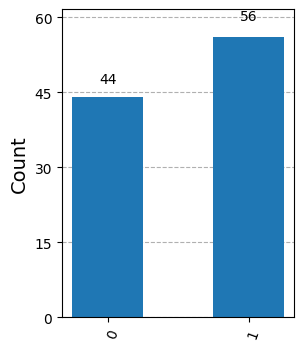

In [ ]:
# 1 QB quantum register
qr = QuantumRegister(1, name="QB")  # Crea un registro cuántico con 1 qubit, nombrado "QB".

# 1 bit classical register -- the length of the register is the number of measurements (number of Stern-Gerlach machines)
cr = ClassicalRegister(1, name='c')  # Crea un registro clásico con 1 bit, nombrado "c", para almacenar los resultados de las mediciones.

# quantum circuit combines quantum and classical registers
qc = QuantumCircuit(qr, cr)  # Crea un circuito cuántico que combina el registro cuántico y el registro clásico.

# applying this gate makes our source which generates qubits which are an equal superposition of |0> and |1> AND an equal superposition of |+> and |->
qc.rx(np.pi/2, 0)  # Aplica la puerta RX al qubit 0, creando una superposición igual de los estados |0⟩ y |1⟩ (y también de |+⟩ y |-⟩).

qc.h(0)  # Aplica la puerta Hadamard al qubit 0, transformando la superposición en una base que permite medir en la base X.

qc.measure(0, cr)  # Mide el qubit 0 y almacena el resultado en el registro clásico.

qc.h(0)  # Aplica nuevamente la puerta Hadamard al qubit 0. (Nota: Esto no tiene efecto después de la medición, pero se incluye aquí).

print('X basis measurement:')  # Imprime un mensaje indicando que se realizará una medición en la base X.
display(qc.draw('mpl'))  # Dibuja y muestra el circuito cuántico en formato gráfico utilizando Matplotlib.

backend = Aer.get_backend('qasm_simulator')  # Obtiene el backend del simulador cuántico QASM de Aer.
new_circuit = transpile(qc, backend)  # Transpila el circuito cuántico para optimizarlo y hacerlo compatible con el backend.
job = backend.run(new_circuit, shots=100)  # Ejecuta el circuito transpileado en el backend, realizando 100 mediciones (shots).
results = job.result()  # Obtiene los resultados de la ejecución del trabajo en el backend.
counts = results.get_counts()  # Extrae las cuentas (resultados de medición) del objeto de resultados.
plot_histogram(counts, figsize=(3,4))  # Muestra un histograma de las cuentas obtenidas como resultado de las mediciones.

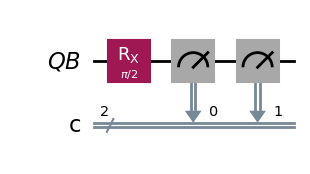

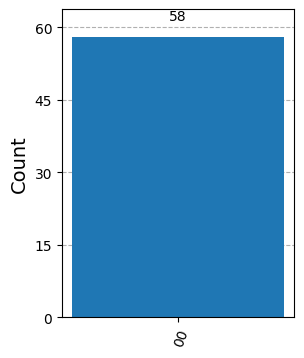

We measured 0 for 58.0% of the shots and 1 for 0.0% of the shots.


In [ ]:
# A) Podemos recrear cada uno de los experimentos de Stern-Gerlach que hicimos antes de usar este. Aquí mostramos el primero.
# 1 QB quantum register
qr = QuantumRegister(1, name="QB")  # Crea un registro cuántico con 1 qubit, nombrado "QB".

# 2 bit classical register -- the length of the register is the number of measurements (number of Stern-Gerlach machines)
cr = ClassicalRegister(2, name='c')  # Crea un registro clásico con 2 bits, nombrado "c", para almacenar los resultados de las mediciones.

# quantum circuit combines quantum and classical registers
qc = QuantumCircuit(qr, cr)  # Crea un circuito cuántico que combina el registro cuántico y el registro clásico.

# number of shots
num_shots = 100  # Define el número de ejecuciones (shots) del circuito cuántico.

# applying this gate makes our source which generates qubits which are an equal superposition of |0> and |1> AND an equal superposition of |+> and |->
qc.rx(np.pi/2, 0)  # Aplica la puerta RX al qubit 0, creando una superposición igual de los estados |0⟩ y |1⟩ (y también de |+⟩ y |-⟩).

qc.measure(0, cr[0])  # Mide el qubit 0 y almacena el resultado en el primer bit del registro clásico.
qc.measure(0, cr[1])  # Mide nuevamente el qubit 0 y almacena el resultado en el segundo bit del registro clásico.
display(qc.draw('mpl'))  # Dibuja y muestra el circuito cuántico en formato gráfico utilizando Matplotlib.

backend = Aer.get_backend('qasm_simulator')  # Obtiene el backend del simulador cuántico QASM de Aer.
new_circuit = transpile(qc, backend)  # Transpila el circuito cuántico para optimizarlo y hacerlo compatible con el backend.
job = backend.run(new_circuit, shots=num_shots)  # Ejecuta el circuito transpileado en el backend, realizando 'num_shots' mediciones.
results = job.result()  # Obtiene los resultados de la ejecución del trabajo en el backend.
counts = results.get_counts()  # Extrae las cuentas (resultados de medición) del objeto de resultados.

# filter our counts... We only want to keep measurements for which the first bit is 0
# This corresponds to blocking the minus port of the first Z Stern-Gerlach machine
filtered_counts = {key: counts[key] for key in counts.keys() if key[-1] == '0'}
# Filtra las cuentas para conservar solo aquellas en las que el último bit es '0'.

# compute the number of measurements of the final bit being 0 vs. 1
output_counts = {}
for bit in [0, 1]:
    output_counts[bit] = [filtered_counts[key] for key in filtered_counts.keys() if key[0] == str(bit)]
    # Cuenta las mediciones donde el primer bit es '0' o '1' en las cuentas filtradas.

display(plot_histogram(filtered_counts, figsize=(3,4)))
# Muestra un histograma de las cuentas filtradas obtenidas como resultado de las mediciones.

print(f"We measured 0 for {sum(output_counts[0])*100/num_shots}% of the shots and 1 for {sum(output_counts[1])*100/num_shots}% of the shots.")
# Imprime la proporción de veces que se midió '0' y '1' en relación con el número total de ejecuciones.

# Problemas Prácticos
Recrea cada uno de los siguientes experimentos de Stern-Gerlach como circuitos Qiskit. Vuelve a comprobar que, en el límite de disparos, los porcentajes finales coincidan con lo que esperabas de tus cálculos anteriores.

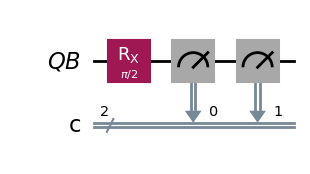

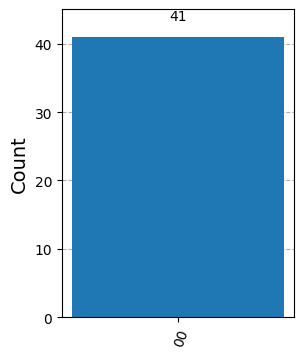

We measured 0 for 41.0% of the shots and 1 for 0.0% of the shots.


In [ ]:
# B)
# B)
# 1 QB quantum register
qr = QuantumRegister(1, name="QB")  # Crea un registro cuántico con 1 qubit, nombrado "QB".

# 2 bit classical register -- the length of the register is the number of measurements (number of Stern-Gerlach machines)
cr = ClassicalRegister(2, name='c')  # Crea un registro clásico con 2 bits, nombrado "c", para almacenar los resultados de las mediciones.

# quantum circuit combines quantum and classical registers
qc = QuantumCircuit(qr, cr)  # Crea un circuito cuántico que combina el registro cuántico y el registro clásico.

# applying this gate makes our source which generates qubits which are an equal superposition of |0> and |1> AND an equal superposition of |+> and |->
qc.rx(np.pi/2, 0)  # Aplica la puerta RX al qubit 0, creando una superposición igual de los estados |0⟩ y |1⟩ (y también de |+⟩ y |-⟩).

# Add measurements to the circuit
qc.measure(qr[0], cr[0])  # Measure the qubit to the first classical bit
qc.measure(qr[0], cr[1])  # Measure the qubit again to the second classical bit


display(qc.draw('mpl'))  # Dibuja y muestra el circuito cuántico en formato gráfico utilizando Matplotlib.

backend = Aer.get_backend('qasm_simulator')  # Obtiene el backend del simulador cuántico QASM de Aer.
new_circuit = transpile(qc, backend)  # Transpila el circuito cuántico para optimizarlo y hacerlo compatible con el backend.
job = backend.run(new_circuit, shots=100)  # Ejecuta el circuito transpileado en el backend, realizando 100 mediciones (shots).
results = job.result()  # Obtiene los resultados de la ejecución del trabajo en el backend.
counts = results.get_counts()  # Extrae las cuentas (resultados de medición) del objeto de resultados.

# filter our counts... We only want to keep measurements for which the first bit is 0
# This corresponds to blocking the minus port of the first Z Stern-Gerlach machine
filtered_counts = {key: counts[key] for key in counts.keys() if key[-1] == '0'}
# Filtra las cuentas para conservar solo aquellas en las que el último bit es '0'.

# compute the number of measurements of the final bit being 0 vs. 1
output_counts = {}
for bit in [0, 1]:
    output_counts[bit] = [filtered_counts[key] for key in filtered_counts.keys() if key[0] == str(bit)]
    # Cuenta las mediciones donde el primer bit es '0' o '1' en las cuentas filtradas.

display(plot_histogram(filtered_counts, figsize=(3,4)))
# Muestra un histograma de las cuentas filtradas obtenidas como resultado de las mediciones.
num_shots = 100
print(f"We measured 0 for {sum(output_counts[0])*100/num_shots}% of the shots and 1 for {sum(output_counts[1])*100/num_shots}% of the shots.")
# Imprime la proporción de veces que se midió '0' y '1' en relación con el número total de ejecuciones.

# PROTOCOLO BB84
Hoy aprendimos sobre un protocolo de distribución de claves cuánticas (QKD) llamado BB84, que aprovecha la superposición cuántica para crear de forma segura una clave compartida entre dos usuarios (a quienes solemos llamar Alice y Bob). Alice y Bob también podrán detectar si alguien intenta "espiar" para conocer la clave. Todo lo que se requiere para BB84 es un canal cuántico y un canal de comunicación clásico, ninguno de los cuales necesita ser seguro. Resumimos los pasos del protocolo aquí:


Bit #1
Alice Bit: 1, Alice Basis: X, Bob Basis: Z


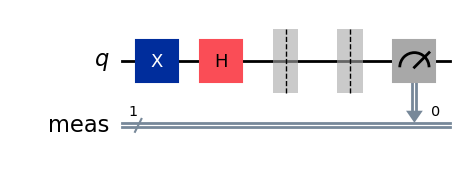

Bob measured 0

Bit #2
Alice Bit: 0, Alice Basis: Z, Bob Basis: Z


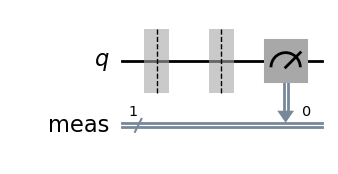

Bob measured 0

Bit #3
Alice Bit: 1, Alice Basis: X, Bob Basis: Z


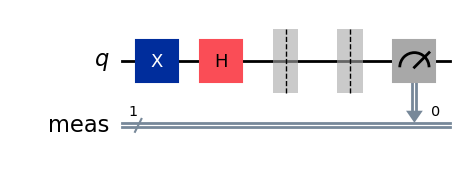

Bob measured 1

Bit #4
Alice Bit: 0, Alice Basis: X, Bob Basis: X


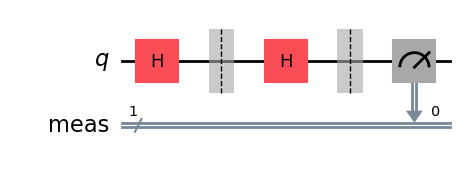

Bob measured 0

Bit #5
Alice Bit: 1, Alice Basis: Z, Bob Basis: X


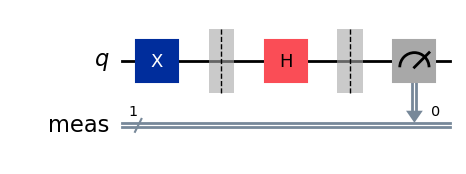

Bob measured 0



In [ ]:
#Ahora veamos cómo podemos implementar este protocolo en Qiskit.
# BB84 Protocol

n = 5  # number of bits

# randomly choose Alice's bits and bases, and Bob's bases
alice_bits = np.random.choice([0, 1], n)  # Genera un array de bits aleatorios (0 o 1) para Alice.
alice_bases = np.random.choice([0, 1], n)  # Genera un array de bases aleatorias (0 o 1) para Alice.
bob_bases = np.random.choice([0, 1], n)  # Genera un array de bases aleatorias (0 o 1) para Bob.

bob_bits = np.zeros(len(alice_bits), dtype=int)  # Inicializa un array para almacenar los resultados de las mediciones de Bob.

# simulator backend
backend = Aer.get_backend('qasm_simulator')  # Establece el backend del simulador cuántico QASM.

# loop through all bits
for i in range(n):  # Itera a través de cada bit.

    print(f"Bit #{i+1}")  # Imprime el número del bit actual.
    print(f"Alice Bit: {alice_bits[i]}, Alice Basis: {'Z' if alice_bases[i] == 0 else 'X'}, Bob Basis: {'Z' if bob_bases[i] == 0 else 'X'}")
    # Imprime el bit y la base elegidos por Alice y la base elegida por Bob.

    qc = QuantumCircuit(1, 0)  # Crea un circuito cuántico con un qubit y sin bits clásicos.

    # bit flip if preparing the |1> state
    if alice_bits[i] == 1:
        qc.x(0)  # Aplica la puerta X (NOT cuántico) si el bit de Alice es |1>.

    # H gate if X basis
    if alice_bases[i] == 1:
        qc.h(0)  # Aplica la puerta Hadamard si la base de Alice es X.

    qc.barrier()  # Añade una barrera visual entre los pasos de Alice y Bob.

    # H gate if X basis
    if bob_bases[i] == 1:
        qc.h(0)  # Aplica la puerta Hadamard si la base de Bob es X.

    qc.measure_all()  # Mide todos los qubits en el circuito.

    display(qc.draw("mpl"))  # Dibuja y muestra el circuito cuántico en formato gráfico utilizando Matplotlib.

    # simulate for 1 shot
    new_circuit = transpile(qc, backend)  # Transpila el circuito para optimizarlo para el backend.
    job = backend.run(new_circuit, shots=1)  # Ejecuta el circuito en el backend, realizando una única medición.
    results = job.result()  # Obtiene los resultados de la ejecución del circuito.
    counts = results.get_counts()  # Extrae las cuentas (resultados de medición).

    # save Bob's measurement result
    bob_bits[i] = 0 if '0' in counts.keys() else 1
    # Guarda el resultado de la medición de Bob: asigna '0' si se mide '0', de lo contrario asigna '1'.

    print(f"Bob measured {bob_bits[i]:.0f}")  # Imprime el resultado medido por Bob.
    print()  # Imprime una línea en blanco para mayor claridad.


In [ ]:

# Define the function convert_to_basis_string to convert basis representations
def convert_to_basis_string(bases):
    """Converts a list of basis representations (0 or 1) to a string representation ('Z' or 'X')."""
    return "".join(['Z' if base == 0 else 'X' for base in bases])

# Post-selection

print("Measurement Results:")  # Imprime un encabezado para los resultados de la medición.
print(f"Alice's bitstring: {alice_bits}")  # Muestra la secuencia de bits generada por Alice.
print(f"  Bob's bitstring: {bob_bits}")  # Muestra la secuencia de bits medidos por Bob.
print()  # Imprime una línea en blanco para mayor claridad.

print("Basis Comparison:")  # Imprime un encabezado para la comparación de bases.
print(f"Alice's bases: {convert_to_basis_string(alice_bases)}")  # Muestra las bases elegidas por Alice, convertidas a una representación legible.
print(f"  Bob's bases: {convert_to_basis_string(bob_bases)}")  # Muestra las bases elegidas por Bob, convertidas a una representación legible.
print()  # Imprime una línea en blanco para mayor claridad.

# only keep bits where the basis is in agreement
keep_idxs = alice_bases == bob_bases  # Crea un array booleano que indica dónde las bases de Alice y Bob coinciden.
alice_key = alice_bits[keep_idxs]  # Filtra los bits de Alice donde las bases coinciden.
bob_key = bob_bits[keep_idxs]  # Filtra los bits de Bob donde las bases coinciden.

print("Keys:")  # Imprime un encabezado para las claves finales.
print(f"Alice's key: {alice_key}")  # Muestra la clave final de Alice.
print(f"  Bob's key: {bob_key}")  # Muestra la clave final de Bob.
print()  # Imprime una línea en blanco para mayor claridad.

Measurement Results:
Alice's bitstring: [1 0 1 0 1]
  Bob's bitstring: [0 0 1 0 0]

Basis Comparison:
Alice's bases: XZXXZ
  Bob's bases: ZZZXX

Keys:
Alice's key: [0 0]
  Bob's key: [0 0]



# PROTOCOLO COMPLETO
A continuación, tenemos un código que implementa el protocolo completo con posprocesamiento. Ejecútelo varias veces para ver cómo Alice y Bob crean su clave compartida.

In [ ]:
# BB84 Protocol

n = 20  # number of bits  # Define el número de bits a utilizar en la comunicación.

# randomly choose Alice's bits and bases, and Bob's bases
alice_bits = np.random.choice([0, 1], n)  # Genera un array de bits aleatorios (0 o 1) para Alice.
alice_bases = np.random.choice([0, 1], n)  # Genera un array de bases aleatorias (0 o 1) para Alice.
bob_bases = np.random.choice([0, 1], n)  # Genera un array de bases aleatorias (0 o 1) para Bob.
bob_bits = np.zeros(len(alice_bits), dtype=int)  # Inicializa un array para almacenar los resultados de las mediciones de Bob.

# simulator backend
backend = Aer.get_backend('qasm_simulator')  # Establece el backend del simulador cuántico QASM.

# loop through all bits
for i in range(n):  # Itera a través de cada bit.

    qc = QuantumCircuit(1, 0)  # Crea un circuito cuántico con un qubit y sin bits clásicos.

    # bit flip if preparing the |1> state
    if alice_bits[i] == 1:
        qc.x(0)  # Aplica la puerta X (NOT cuántico) si el bit de Alice es |1>.

    # H gate if X basis
    if alice_bases[i] == 1:
        qc.h(0)  # Aplica la puerta Hadamard si la base de Alice es X.

    qc.barrier()  # Añade una barrera visual entre los pasos de Alice y Bob.

    # H gate if X basis
    if bob_bases[i] == 1:
        qc.h(0)  # Aplica la puerta Hadamard si la base de Bob es X.

    qc.measure_all()  # Mide todos los qubits en el circuito.

    new_circuit = transpile(qc, backend)  # Transpila el circuito para optimizarlo para el backend.
    job = backend.run(new_circuit, shots=1)  # Ejecuta el circuito en el backend, realizando una única medición.
    results = job.result()  # Obtiene los resultados de la ejecución del circuito.
    counts = results.get_counts()  # Extrae las cuentas (resultados de medición).

    # save Bob's measurement result
    bob_bits[i] = 0 if '0' in counts.keys() else 1
    # Guarda el resultado de la medición de Bob: asigna '0' si se mide '0', de lo contrario asigna '1'.

# Post-selection
print("Measurement Results:")  # Imprime un encabezado para los resultados de la medición.
print(f"Alice's bitstring: {alice_bits}")  # Muestra la secuencia de bits generada por Alice.
print(f"  Bob's bitstring: {bob_bits}")  # Muestra la secuencia de bits medidos por Bob.
print()  # Imprime una línea en blanco para mayor claridad.

print("Basis Comparison:")  # Imprime un encabezado para la comparación de bases.
print(f"Alice's bases: {convert_to_basis_string(alice_bases)}")  # Muestra las bases elegidas por Alice, convertidas a una representación legible.
print(f"  Bob's bases: {convert_to_basis_string(bob_bases)}")  # Muestra las bases elegidas por Bob, convertidas a una representación legible.
print()  # Imprime una línea en blanco para mayor claridad.

# only keep bits where the basis is in agreement
keep_idxs = alice_bases == bob_bases  # Crea un array booleano que indica dónde las bases de Alice y Bob coinciden.
alice_key = alice_bits[keep_idxs]   # Filtra los bits de Alice donde las bases coinciden.
bob_key = bob_bits[keep_idxs]   # Filtra los bits de Bob donde las bases coinciden.

print("Keys:")   # Imprime un encabezado para las claves finales.
print(f"Alice's key: {alice_key}")   # Muestra la clave final de Alice.
print(f"  Bob's key: {bob_key}")   # Muestra la clave final de Bob.
print()   # Imprime una línea en blanco para mayor claridad.


Measurement Results:
Alice's bitstring: [0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0]
  Bob's bitstring: [0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0]

Basis Comparison:
Alice's bases: XXXZXXZZZZZZZZXXZXXX
  Bob's bases: ZXZXXXXXZZXZXZXZZXZZ

Keys:
Alice's key: [1 1 0 1 1 1 1 1 0 1]
  Bob's key: [1 1 0 1 1 1 1 1 0 1]



# Añadiendo a Eva... >:)
* En la práctica, el canal cuántico de Alice y Bob no es seguro. Por lo tanto, no saben qué ocurre desde el momento en que Alice envía el qubit hasta el momento en que Bob lo recibe. Podemos modelar esto como una "caja negra" donde Eve (nuestra espía) puede hacer algo nefasto...
* Si Eve pudiera hacer una copia perfecta del qubit de Alice y enviar el qubit original a Bob, ¡entonces estaría bien! Podría simplemente almacenar el qubit, esperar a que Alice y Bob anuncien sus bases a través de un canal no seguro y luego medir sus qubits de copia en las mismas bases que Alice. Entonces tendría exactamente la misma clave que Alice y Bob, frustrando sus planes. Desafortunadamente para Eve, y afortunadamente para Alice y Bob, esto es imposible, gracias al Teorema de No Clonación.
* Bien, Eve no puede copiar el qubit de Alice, pero podría intentar otras cosas. En los problemas a continuación, explore los ataques que Eve puede intentar hacer para conocer la clave de Alice y Bob.

# 1) Ataque de medición simple
Lo más sencillo que podría intentar hacer Eve es medir el qubit de Alice y luego enviárselo a Bob. En el código que aparece a continuación, implementamos un ataque de este tipo.


Bit #1
Alice Bit: 0, Alice Basis: Z, Bob Basis: X


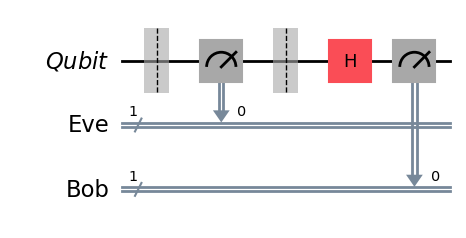

Bob measured 0
Eve measured 0

Bit #2
Alice Bit: 0, Alice Basis: Z, Bob Basis: Z


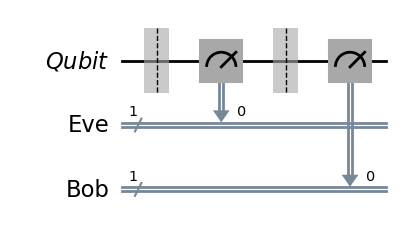

Bob measured 0
Eve measured 0

Bit #3
Alice Bit: 0, Alice Basis: X, Bob Basis: X


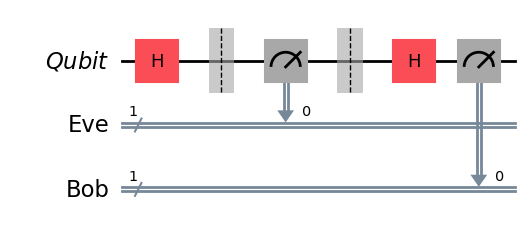

Bob measured 1
Eve measured 1

Bit #4
Alice Bit: 1, Alice Basis: Z, Bob Basis: X


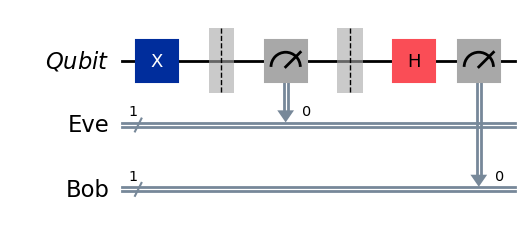

Bob measured 0
Eve measured 1

Bit #5
Alice Bit: 1, Alice Basis: Z, Bob Basis: Z


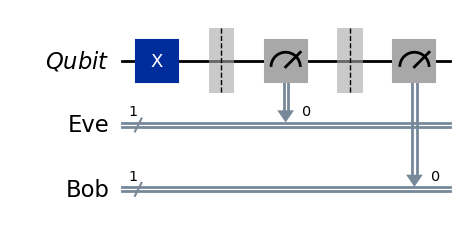

Bob measured 1
Eve measured 1



In [ ]:
# BB84 Protocol with Eve (simple measurement attack)

n = 5  # number of bits  # Define el número de bits a utilizar en la comunicación.

# randomly choose Alice's bits and bases, and Bob's bases
alice_bits = np.random.choice([0, 1], n)  # Genera un array de bits aleatorios (0 o 1) para Alice.
alice_bases = np.random.choice([0, 1], n)  # Genera un array de bases aleatorias (0 o 1) para Alice.
bob_bases = np.random.choice([0, 1], n)  # Genera un array de bases aleatorias (0 o 1) para Bob.
bob_bits = np.zeros(len(alice_bits), dtype=int)  # Inicializa un array para almacenar los resultados de las mediciones de Bob.
eve_bits = np.zeros(len(alice_bits), dtype=int)  # Inicializa un array para almacenar los resultados de las mediciones de Eve.

# simulator backend
backend = Aer.get_backend('qasm_simulator')  # Establece el backend del simulador cuántico QASM.
# quantum register for our qubit
qr = QuantumRegister(1, name="Qubit")  # Crea un registro cuántico con un qubit.
# create two classical registers -- one for Bob's measurement and one for Eve's
c_Bob = ClassicalRegister(1, name='Bob')  # Crea un registro clásico para almacenar las mediciones de Bob.
c_Eve = ClassicalRegister(1, name='Eve')  # Crea un registro clásico para almacenar las mediciones de Eve.

# loop through all bits
for i in range(n):  # Itera a través de cada bit.

    print(f"Bit #{i+1}")  # Imprime el número del bit actual.
    print(f"Alice Bit: {alice_bits[i]}, Alice Basis: {'Z' if alice_bases[i] == 0 else 'X'}, Bob Basis: {'Z' if bob_bases[i] == 0 else 'X'}")
    # Imprime el bit y la base elegidos por Alice y la base elegida por Bob.

    qc = QuantumCircuit(qr, c_Eve, c_Bob)  # Crea un circuito cuántico con un qubit y registros clásicos para Bob y Eve.

    # bit flip if preparing the |1> state
    if alice_bits[i] == 1:
        qc.x(0)  # Aplica la puerta X (NOT cuántico) si el bit de Alice es |1>.

    # H gate if X basis
    if alice_bases[i] == 1:
        qc.h(0)  # Aplica la puerta Hadamard si la base de Alice es X.

    qc.barrier()  # Añade una barrera visual entre los pasos de Alice y Eve.

    # Eve measures the qubit
    qc.measure(qr, c_Eve)  # Eve mide el qubit y almacena el resultado en su registro clásico.

    qc.barrier()  # Añade una barrera visual entre Eve y Bob.

    # H gate if X basis
    if bob_bases[i] == 1:
        qc.h(0)  # Aplica la puerta Hadamard si la base de Bob es X.

    qc.measure(qr, c_Bob)  # Bob mide el qubit y almacena el resultado en su registro clásico.

    display(qc.draw("mpl"))  # Dibuja y muestra el circuito cuántico en formato gráfico utilizando Matplotlib.

    # simulate for 1 shot
    new_circuit = transpile(qc, backend)  # Transpila el circuito para optimizarlo para el backend.
    job = backend.run(new_circuit, shots=1)  # Ejecuta el circuito en el backend, realizando una única medición.
    results = job.result()  # Obtiene los resultados de la ejecución del circuito.
    counts = results.get_counts()  # Extrae las cuentas (resultados de medición).

    # extract counts -- Bob's is first because he measured last (potentially counterintuitive ordering)
    bob_counts = {key[0]: value for key, value in counts.items()}   # Extrae los resultados medidos por Bob.
    eve_counts = {key[-1]: value for key, value in counts.items()}   # Extrae los resultados medidos por Eve.

    # save Bob and Eve's measurement results
    bob_bits[i] = 0 if '0' in bob_counts.keys() else 1
    # Guarda el resultado de la medición de Bob: asigna '0' si se mide '0', de lo contrario asigna '1'.

    eve_bits[i] = 0 if '0' in eve_counts.keys() else 1
    # Guarda el resultado de la medición de Eve: asigna '0' si se mide '0', de lo contrario asigna '1'.

    print(f"Bob measured {bob_bits[i]:.0f}")   # Imprime el resultado medido por Bob.
    print(f"Eve measured {eve_bits[i]:.0f}")   # Imprime el resultado medido por Eve.
    print()   # Imprime una línea en blanco para mayor claridad.


# 2) Protocolo completo - Ataque de medición simple
A continuación se muestra el protocolo completo con posprocesamiento. Puedes jugar con él para hacerte una idea de cómo falla el ataque de Eve.


In [ ]:
# BB84 Protocol

n = 20  # number of bits  # Define el número de bits a utilizar en la comunicación.

# randomly choose Alice's bits and bases, and Bob's bases
alice_bits = np.random.choice([0, 1], n)  # Genera un array de bits aleatorios (0 o 1) para Alice.
alice_bases = np.random.choice([0, 1], n)  # Genera un array de bases aleatorias (0 o 1) para Alice.
bob_bases = np.random.choice([0, 1], n)  # Genera un array de bases aleatorias (0 o 1) para Bob.
bob_bits = np.zeros(len(alice_bits), dtype=int)  # Inicializa un array para almacenar los resultados de las mediciones de Bob.
eve_bits = np.zeros(len(alice_bits), dtype=int)  # Inicializa un array para almacenar los resultados de las mediciones de Eve.

# simulator backend
backend = Aer.get_backend('qasm_simulator')  # Establece el backend del simulador cuántico QASM.
# quantum register for our qubit
qr = QuantumRegister(1, name="Qubit")  # Crea un registro cuántico con un qubit.
# create two classical registers -- one for Bob's measurement and one for Eve's
c_Bob = ClassicalRegister(1, name='Bob')  # Crea un registro clásico para almacenar las mediciones de Bob.
c_Eve = ClassicalRegister(1, name='Eve')  # Crea un registro clásico para almacenar las mediciones de Eve.

# loop through all bits
for i in range(n):  # Itera a través de cada bit.

    qc = QuantumCircuit(qr, c_Eve, c_Bob)  # Crea un circuito cuántico con un qubit y registros clásicos para Bob y Eve.

    # bit flip if preparing the |1> state
    if alice_bits[i] == 1:
        qc.x(0)  # Aplica la puerta X (NOT cuántico) si el bit de Alice es |1>.

    # H gate if X basis
    if alice_bases[i] == 1:
        qc.h(0)  # Aplica la puerta Hadamard si la base de Alice es X.

    qc.barrier()  # Añade una barrera visual entre los pasos de Alice y Eve.

    # Eve measures the qubit
    qc.measure(qr, c_Eve)  # Eve mide el qubit y almacena el resultado en su registro clásico.

    qc.barrier()  # Añade una barrera visual entre Eve y Bob.

    # H gate if X basis
    if bob_bases[i] == 1:
        qc.h(0)  # Aplica la puerta Hadamard si la base de Bob es X.

    qc.measure(qr, c_Bob)  # Bob mide el qubit y almacena el resultado en su registro clásico.

    # simulate for 1 shot
    new_circuit = transpile(qc, backend)  # Transpila el circuito para optimizarlo para el backend.
    job = backend.run(new_circuit, shots=1)  # Ejecuta el circuito en el backend, realizando una única medición.
    results = job.result()  # Obtiene los resultados de la ejecución del circuito.
    counts = results.get_counts()  # Extrae las cuentas (resultados de medición).

    # extract counts -- Bob's is first because he measured last (potentially counterintuitive ordering)
    bob_counts = {key[0]: value for key, value in counts.items()}   # Extrae los resultados medidos por Bob.
    eve_counts = {key[-1]: value for key, value in counts.items()}   # Extrae los resultados medidos por Eve.

    # save Bob and Eve's measurement results
    bob_bits[i] = 0 if '0' in bob_counts.keys() else 1
    # Guarda el resultado de la medición de Bob: asigna '0' si se mide '0', de lo contrario asigna '1'.

    eve_bits[i] = 0 if '0' in eve_counts.keys() else 1
    # Guarda el resultado de la medición de Eve: asigna '0' si se mide '0', de lo contrario asigna '1'.

# Post-selection
print("Measurement Results:")  # Imprime un encabezado para los resultados de la medición.
print(f"Alice's bitstring: {alice_bits}")  # Muestra la secuencia de bits generada por Alice.
print(f"  Bob's bitstring: {bob_bits}")   # Muestra la secuencia de bits medidos por Bob.
print(f"  Eve's bitstring: {eve_bits}")   # Muestra la secuencia de bits medidos por Eve.
print()   # Imprime una línea en blanco para mayor claridad.

print("Basis Comparison:")   # Imprime un encabezado para la comparación de bases.
print(f"Alice's bases: {convert_to_basis_string(alice_bases)}")   # Muestra las bases elegidas por Alice, convertidas a una representación legible.
print(f"  Bob's bases: {convert_to_basis_string(bob_bases)}")   # Muestra las bases elegidas por Bob, convertidas a una representación legible.
print()   # Imprime una línea en blanco para mayor claridad.

# only keep bits where the basis is in agreement
keep_idxs = alice_bases == bob_bases   # Crea un array booleano que indica dónde las bases de Alice y Bob coinciden.
alice_key = alice_bits[keep_idxs]   # Filtra los bits de Alice donde las bases coinciden.
bob_key = bob_bits[keep_idxs]   # Filtra los bits de Bob donde las bases coinciden.
# bases are compared over a public channel, so eve keeps the same indexed bits
eve_key = eve_bits[keep_idxs]   # Filtra los bits de Eve donde las bases coinciden.

print("Keys:")   # Imprime un encabezado para las claves finales.
print(f"Alice's key: {alice_key}")   # Muestra la clave final de Alice.
print(f"  Bob's key: {bob_key}")   # Muestra la clave final de Bob.
print(f"  Eve's key: {eve_key}")   # Muestra la clave final de Eve (lo que ha interceptado).
print()   # Imprime una línea en blanco para mayor claridad.


Measurement Results:
Alice's bitstring: [0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0]
  Bob's bitstring: [1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0]
  Eve's bitstring: [1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0]

Basis Comparison:
Alice's bases: XZZZXZXXZZXZXZZZZZXX
  Bob's bases: ZXZXZZZZZXZZZZZZXZZZ

Keys:
Alice's key: [0 0 1 1 1 0 1 0]
  Bob's key: [0 0 1 1 1 0 1 0]
  Eve's key: [0 0 1 1 1 0 1 0]

